In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import math

In [2]:
# Assuming the CSV file is located in a folder named 'data' which is a subdirectory of the current directory
file_path = 'output_ClinicalData.csv'

# Read the CSV file into a DataFrame
try:
    df = pd.read_csv(file_path, sep = ",", index_col = 0)
    print("CSV file successfully read.")  # Indicate successful reading
except FileNotFoundError:
    print("File not found. Please check the file path.")  # Handle file not found error

# Now you can use 'df' DataFrame for further analysis

CSV file successfully read.


In [3]:
df

,PFS_P,PFS_P_CNSR,AGE,SEX,TRT01P,PDL1FL,TCGA_cluster
ID,,,,,,,
X00936b9285d6b8665ae9122993fb8e91,4.172485,0.0,52,F,Avelumab+Axitinib,0.0,m1
X105622fadc33f23755ac2df823110aca,16.591376,1.0,78,M,Sunitinib,0.0,m1
Xeb5718fc91df508b1eb43b77df50a828,8.706366,0.0,52,F,Avelumab+Axitinib,NaN,NaN
Xe44f39747a8e84b02b4cb24659312144,11.104723,0.0,61,M,Sunitinib,1.0,m2
X293dd1284496215e9a0eca9f17a98e7e,14.028747,1.0,55,M,Sunitinib,1.0,m2
...,...,...,...,...,...,...,...
Xc7439a06ffa32b313b0ec1b987b992a2,6.505133,1.0,43,M,Avelumab+Axitinib,0.0,m1
Xec760e642aeb6c4b26c912213d84f20b,6.866530,1.0,65,F,Avelumab+Axitinib,0.0,NaN
X21a6043653d187f8bbead475d2f49791,5.683778,1.0,79,M,Sunitinib,0.0,m3


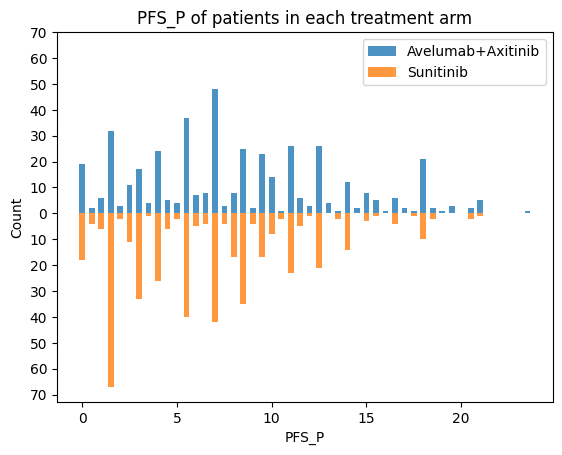

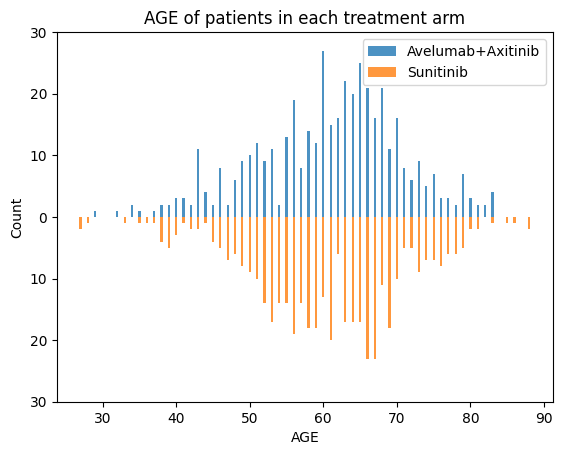

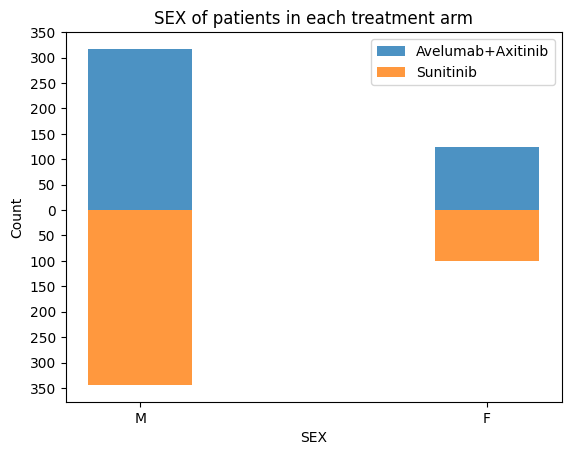

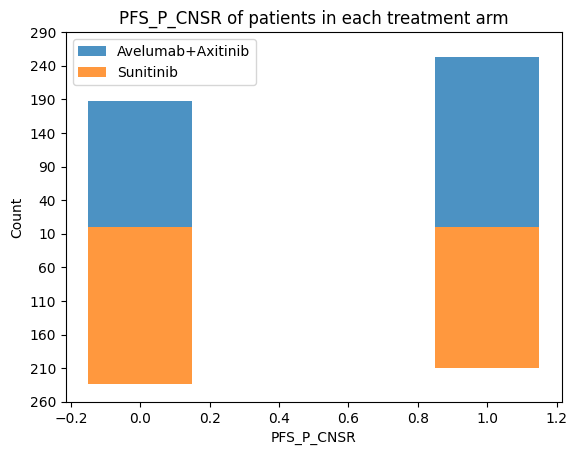

In [13]:
cohorts = [df[df['TRT01P'] == 'Avelumab+Axitinib'], 
           df[df['TRT01P'] == 'Sunitinib']]
names = ['Avelumab+Axitinib', 'Sunitinib']
biomarkers = ['PFS_P', 'AGE', 'SEX', 'PFS_P_CNSR']

for bio in biomarkers:
    maxCount = -1
    step = 1
    for idx, cohort_df in enumerate(cohorts):
        # round(x * 2) / 2 rounds to the nearest .5 => round(2.4 * 2) / 2 = round(4.8) / 2 = 5 / 2 = 2.5
        rounded_list = None
        if len(set(cohort_df[bio].values)) > 10:
            rounded_list = pd.array([round(x * 2) / 2 for x in cohort_df[bio].values])
        else:
            rounded_list = pd.array([x for x in cohort_df[bio].values])
        counts = rounded_list.value_counts()
        keys = counts.keys()
        values = counts.values
        if (max(values) > maxCount):
            maxCount = (max(values) + 10) - (max(values) % 10)
        if idx == 1:
            values = -values
        plt.bar(keys, values, alpha = .8, width = .3, label = names[idx])

    if (maxCount > 100):
        step = 50
    else:
        step = 10
    plt.yticks(np.arange(-maxCount,maxCount+(step-1),step), abs(np.arange(-maxCount,maxCount+(step-1),step)))
    plt.title(bio + " of patients in each treatment arm")
    plt.xlabel(bio)
    plt.ylabel("Count")
    plt.legend()
    plt.show()

In [17]:
max(df['PFS_P'].values)

23.62217659